<a href="https://colab.research.google.com/github/snowshine/NFTCreators/blob/main/gan/process_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# !pip install Image

import numpy as np
from PIL import Image
from tqdm import tqdm
import os 
import time
import matplotlib.pyplot as plt
import zipfile

In [4]:
# Mount google drive to colab. need run for every session

from google.colab import drive
drive.mount('/content/drive')
# drive._mount('/content/drive')
# drive.mount("/content/drive", force_remount=True)

# change working directory
%cd /content/drive/MyDrive/capstone/
!ls -art

Mounted at /content/drive
/content/drive/MyDrive/capstone
cryptopunks.npz		   output	hapeprime	   hapeprime32.npz
mutant-ape-yacht-club.npz  meebits.npz	cryptopunks32.npz


### Preparing the image dataset: convert to NumPy arrays and store for later use

load and preprocess the images. store the processed file as a binary. This way we can simply reload the processed training data and quickly use it. 

In [5]:
def prepareImages(sourcedir, outputname, result_imgshape):
  start = time.time()

  training_data = []  
  imgfiles   = np.sort(os.listdir(sourcedir))
  for filename in tqdm(imgfiles):      
      path = os.path.join(sourcedir,filename)
      try: 
        image = Image.open(path).resize(result_imgshape[:2], Image.ANTIALIAS).convert('RGB')
      except: #skip bad images
        pass
      training_data.append(np.asarray(image))
  
  training_data = np.reshape(training_data,(-1, result_imgshape[0], result_imgshape[1], result_imgshape[2]))
  training_data = training_data.astype(np.float32)
  # Normalize the images to [-1, 1]
  training_data = training_data / 127.5 - 1.
  # rescales the image pixels to [0,1] because the RGB pixel scale for images is from 1–255
  # training_data = training_data / 255

  # Saving training image binary
  outputfile = outputname + ".npz"  # size much smaller than .npy
  np.savez_compressed(outputfile, training_data)
  
  print (f'Image preprocess time: {hms_string(time.time()-start)}')

  return outputfile, training_data

def unzip(filename, targetdir):   
  with zipfile.ZipFile(filename,"r") as zip_ref:
    zip_ref.extractall(targetdir)
  return targetdir

# scale image from [-1,1] to [0,255] for display
def rescale_image(imagedata): 
  images = (imagedata + 1) * 127.5
  images = images.astype(np.int32)
  return images

def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60.
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

def plot_images(imgs, grid_size = 5):
    """
    plot images in a nxn grid
    imgs: vector containing all the numpy images
    grid_size: nxn grid containing images
    """     
    fig = plt.figure(figsize = (8, 8))
    columns = rows = grid_size
    plt.title("Training Images")
 
    for i in range(1, columns*rows+1):
        plt.axis("off")
        fig.add_subplot(rows, columns, i)
        plt.imshow(imgs[i])
    plt.show()


In [ ]:
# unzip if needed
# image_dir = unzip('hapeprime_archive.zip', 'hapeprime')
# image_dir = unzip('meebits_archive.zip', 'meebits')

# unzip('generator.zip', 'generator')
# unzip('discriminator.zip', 'discriminator')

In [6]:
# prepare image data
image_dir ='hapeprime'
result_imgshape = (32, 32, 3)
# result_imgshape = (128, 128, 3)

# prepareImages('cryptopunks', 'cryptopunks', result_imgshape)
# prepareImages('mutant-ape-yacht-club', 'mutant-ape-yacht-club', result_imgshape)  # 0:06:42.82

outputfile, training_data = prepareImages(image_dir, image_dir, result_imgshape)  # 0:06:42.82

100%|██████████| 81919/81919 [4:07:21<00:00,  5.52it/s]


Image preprocess time: 4:11:58.71


### Test image data
load generated image binary file, spot check data and display images

In [8]:
# check result
# image_data = np.load('cryptopunks32.npz')['arr_0']  # (10000, 32, 32, 3)
# image_data = np.load('cryptopunks.npz')['arr_0']

# image_data = np.load('mutant-ape-yacht-club.npz')['arr_0']  # (10050, 128, 128, 3)
# image_data = np.load('meebits.npz')['arr_0']  # (19798, 128, 128, 3)
image_data = np.load('hapeprime32.npz')['arr_0']

image_data.shape
# image_data[0][0][0][0], image_data[0][0][0][1], image_data[0][0][0][2]

(81919, 32, 32, 3)

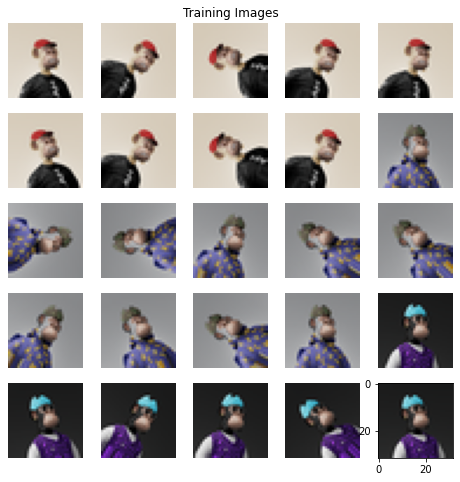

In [10]:
# scale data back to [0, 255] for display
images = rescale_image(image_data)
# images[0][0][0][0], images[0][0][0][1], images[0][0][0][2]

plot_images(images[:50])